In [359]:
import pandas as pd
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas
import geoviews as gv
import holoviews as hv

In [360]:
## Get the path and read CSV file
path="2022_us .csv"
origin_data=pd.read_csv(path,encoding="ISO-8859-1")
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)
origin_data.head()

C:\Users\yixua\AppData\Local\Temp\ipykernel_35312\1911066109.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  origin_data=pd.read_csv(path,encoding="ISO-8859-1")


,1. YEAR,2. TRIFD,3. FRS ID,4. FACILITY NAME,5. STREET ADDRESS,6. CITY,7. COUNTY,8. ST,9. ZIP,10. BIA,11. TRIBE,12. LATITUDE,13. LONGITUDE,14. HORIZONTAL DATUM,15. PARENT CO NAME,16. PARENT CO DB NUM,17. STANDARD PARENT CO NAME,18. FEDERAL FACILITY,19. INDUSTRY SECTOR CODE,20. INDUSTRY SECTOR,21. PRIMARY SIC,22. SIC 2,23. SIC 3,24. SIC 4,25. SIC 5,26. SIC 6,27. PRIMARY NAICS,28. NAICS 2,29. NAICS 3,30. NAICS 4,31. NAICS 5,32. NAICS 6,33. DOC_CTRL_NUM,34. CHEMICAL,35. ELEMENTAL METAL INCLUDED,36. TRI CHEMICAL/COMPOUND ID,37. CAS#,38. SRS ID,39. CLEAN AIR ACT CHEMICAL,40. CLASSIFICATION,41. METAL,42. METAL CATEGORY,43. CARCINOGEN,44. PBT,45. PFAS,46. FORM TYPE,47. UNIT OF MEASURE,48. 5.1 - FUGITIVE AIR,49. 5.2 - STACK AIR,50. 5.3 - WATER,51. 5.4 - UNDERGROUND,52. 5.4.1 - UNDERGROUND CL I,53. 5.4.2 - UNDERGROUND C II-V,54. 5.5.1 - LANDFILLS,55. 5.5.1A - RCRA C LANDFILL,56. 5.5.1B - OTHER LANDFILLS,57. 5.5.2 - LAND TREATMENT,58. 5.5.3 - SURFACE IMPNDMNT,59. 5.5.3A - RCRA SURFACE IM,60. 5.5.3B - OTHER SURFACE I,61. 5.5.4 - OTHER DISPOSAL,62. ON-SITE RELEASE TOTAL,63. 6.1 - POTW - TRNS RLSE,64. 6.1 - POTW - TRNS TRT,65. POTW - TOTAL TRANSFERS,66. 6.2 - M10,67. 6.2 - M41,68. 6.2 - M62,69. 6.2 - M40 METAL,70. 6.2 - M61 METAL,71. 6.2 - M71,72. 6.2 - M81,73. 6.2 - M82,74. 6.2 - M72,75. 6.2 - M63,76. 6.2 - M66,77. 6.2 - M67,78. 6.2 - M64,79. 6.2 - M65,80. 6.2 - M73,81. 6.2 - M79,82. 6.2 - M90,83. 6.2 - M94,84. 6.2 - M99,85. OFF-SITE RELEASE TOTAL,86. 6.2 - M20,87. 6.2 - M24,88. 6.2 - M26,89. 6.2 - M28,90. 6.2 - M93,91. OFF-SITE RECYCLED TOTAL,92. 6.2 - M56,93. 6.2 - M92,94. OFF-SITE ENERGY RECOVERY T,95. 6.2 - M40 NON-METAL,96. 6.2 - M50,97. 6.2 - M54,98. 6.2 - M61 NON-METAL,99. 6.2 - M69,100. 6.2 - M95,101. OFF-SITE TREATED TOTAL,102. 6.2 - UNCLASSIFIED,103. 6.2 - TOTAL TRANSFER,104. TOTAL RELEASES,105. 8.1 - RELEASES,106. 8.1A - ON-SITE CONTAINED,107. 8.1B - ON-SITE OTHER,108. 8.1C - OFF-SITE CONTAIN,109. 8.1D - OFF-SITE OTHER R,110. 8.2 - ENERGY RECOVER ON,111. 8.3 - ENERGY RECOVER OF,112. 8.4 - RECYCLING ON SITE,113. 8.5 - RECYCLING OFF SIT,114. 8.6 - TREATMENT ON SITE,115. 8.7 - TREATMENT OFF SITE,116. PRODUCTION WSTE (8.1-8.7),117. 8.8 - ONE-TIME RELEASE,118. PROD_RATIO_OR_ ACTIVITY,119. 8.9 - PRODUCTION RATIO,Unnamed: 119
0,2022,73098KRRMC906SO,110000000000.00,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,GARVIN,OK,73098,906.00,The Chickasaw Nation,34.63,-97.17,NAD83,CVR ENERGY INC,795416135,CVR ENERGY INC,NO,324,Petroleum,NaN,NaN,NaN,NaN,NaN,NaN,324110,NaN,NaN,NaN,NaN,NaN,1322220000000.00,Certain glycol ethers,NO,N230,N230,649541.00,YES,TRI,NO,May contain metal,NO,NO,NO,R,Pounds,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,ACTIVITY,1.00,NaN
1,2022,74764WYRHSHIGHW,110001000000.00,INTERNATIONAL PAPER CO,890 IP LN,VALLIANT,MCCURTAIN,OK,74764,907.00,The Choctaw Nation of Oklahoma,34.00,-95.11,NAD83,INTERNATIONAL PAPER CO,001316561,INTERNATIONAL PAPER CO,NO,322,Paper,NaN,NaN,NaN,NaN,NaN,NaN,322130,NaN,NaN,NaN,NaN,NaN,1322220000000.00,Lead compounds,NO,N420,N420,650002.00,YES,PBT,YES,Metal complound categories,NO,YES,NO,R,Pounds,0.00,949.00,166.00,0.00,0.00,0.00,0.00,0.00,1833.00,0.00,0.00,0.00,0.00,0.00,2948.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2718.00,2718.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2718.00,2948.00,0.00,1833.00,1115.00,0.00,0.00,0.00,0.00,0.00,2718.00,0.00,0.00,5666.00,0.00,PRODUCTION,0.97,NaN
2,2022,7453WCLGTT475MI,110058000000.00,COALGATE TUPELO STONEWALL GAS PLANT,37791 STATE HWY 3,COALGATE,COAL,OK,74538,907.00,The Choctaw Nation of Oklahoma,34.59,-96.29,NAD83,TARGA RESOURCES CORP,827389847,TARGA RES

In [361]:
## Select the column we need
col=["4. FACILITY NAME","5. STREET ADDRESS","6. CITY","8. ST","12. LATITUDE","13. LONGITUDE","14. HORIZONTAL DATUM","15. PARENT CO NAME","20. INDUSTRY SECTOR","34. CHEMICAL","40. CLASSIFICATION","42. METAL CATEGORY","43. CARCINOGEN","47. UNIT OF MEASURE",
             "48. 5.1 - FUGITIVE AIR","49. 5.2 - STACK AIR","50. 5.3 - WATER","51. 5.4 - UNDERGROUND","52. 5.4.1 - UNDERGROUND CL I","53. 5.4.2 - UNDERGROUND C II-V","54. 5.5.1 - LANDFILLS","55. 5.5.1A - RCRA C LANDFILL","56. 5.5.1B - OTHER LANDFILLS",
             "57. 5.5.2 - LAND TREATMENT","58. 5.5.3 - SURFACE IMPNDMNT","59. 5.5.3A - RCRA SURFACE IM","60. 5.5.3B - OTHER SURFACE I","61. 5.5.4 - OTHER DISPOSAL","85. OFF-SITE RELEASE TOTAL","104. TOTAL RELEASES","116. PRODUCTION WSTE (8.1-8.7)"]
select_col=origin_data[col]
select_col.head(3)           


,4. FACILITY NAME,5. STREET ADDRESS,6. CITY,8. ST,12. LATITUDE,13. LONGITUDE,14. HORIZONTAL DATUM,15. PARENT CO NAME,20. INDUSTRY SECTOR,34. CHEMICAL,40. CLASSIFICATION,42. METAL CATEGORY,43. CARCINOGEN,47. UNIT OF MEASURE,48. 5.1 - FUGITIVE AIR,49. 5.2 - STACK AIR,50. 5.3 - WATER,51. 5.4 - UNDERGROUND,52. 5.4.1 - UNDERGROUND CL I,53. 5.4.2 - UNDERGROUND C II-V,54. 5.5.1 - LANDFILLS,55. 5.5.1A - RCRA C LANDFILL,56. 5.5.1B - OTHER LANDFILLS,57. 5.5.2 - LAND TREATMENT,58. 5.5.3 - SURFACE IMPNDMNT,59. 5.5.3A - RCRA SURFACE IM,60. 5.5.3B - OTHER SURFACE I,61. 5.5.4 - OTHER DISPOSAL,85. OFF-SITE RELEASE TOTAL,104. TOTAL RELEASES,116. PRODUCTION WSTE (8.1-8.7)
0,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.63,-97.17,NAD83,CVR ENERGY INC,Petroleum,Certain glycol ethers,TRI,May contain metal,NO,Pounds,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,INTERNATIONAL PAPER CO,890 IP LN,VALLIANT,OK,34.00,-95.11,NAD83,INTERNATIONAL PAPER CO,Paper,Lead compounds,PBT,Metal complound categories,NO,Pounds,0.00,949.00,166.00,0.00,0.00,0.00,0.00,0.00,1833.00,0.00,0.00,0.00,0.00,0.00,0.00,2948.00,5666.00
2,COALGATE TUPELO STONEWALL GAS PLANT,37791 STATE HWY 3,COALGATE,OK,34.59,-96.29,NAD83,TARGA RESOURCES CORP,Other,Methanol,TRI,Non_Metal,NO,Pounds,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [362]:
## Rename the column
new_col=select_col.copy()
new_col=new_col.rename(columns={"4. FACILITY NAME":"Facility name","5. STREET ADDRESS":"Street Address","6. CITY":"City","8. ST":"State","12. LATITUDE":"Latitude","13. LONGITUDE":"Longitude","14. HORIZONTAL DATUM":"Horizontal","15. PARENT CO NAME":"Parent Co Name","20. INDUSTRY SECTOR":"Industry Sector","34. CHEMICAL":"Chemical",
                "40. CLASSIFICATION":"Class","42. METAL CATEGORY":"Metal Cata","43. CARCINOGEN":"Carcinogen","47. UNIT OF MEASURE":"Unit","48. 5.1 - FUGITIVE AIR":"Fugitive Air","49. 5.2 - STACK AIR":"Stack Air","50. 5.3 - WATER":"Water","51. 5.4 - UNDERGROUND":"Underground","52. 5.4.1 - UNDERGROUND CL I":"Undergroud I","53. 5.4.2 - UNDERGROUND C II-V":"Underground II",
                "54. 5.5.1 - LANDFILLS":"Landfills","55. 5.5.1A - RCRA C LANDFILL":"RCRA C Landfill","56. 5.5.1B - OTHER LANDFILLS":"Other Landfills","57. 5.5.2 - LAND TREATMENT":"Land Treatment","58. 5.5.3 - SURFACE IMPNDMNT":"Surface IM","59. 5.5.3A - RCRA SURFACE IM":"RCRA Surface IM","60. 5.5.3B - OTHER SURFACE I":"Other Surface",
                "61. 5.5.4 - OTHER DISPOSAL":"Other Disposal","62. ON-SITE RELEASE TOTAL":"On_site release","85. OFF-SITE RELEASE TOTAL":"Off_site Disposal","104. TOTAL RELEASES":"Total Releases","116. PRODUCTION WSTE (8.1-8.7)":"Production WSTE"})
new_col.head()

,Facility name,Street Address,City,State,Latitude,Longitude,Horizontal,Parent Co Name,Industry Sector,Chemical,Class,Metal Cata,Carcinogen,Unit,Fugitive Air,Stack Air,Water,Underground,Undergroud I,Underground II,Landfills,RCRA C Landfill,Other Landfills,Land Treatment,Surface IM,RCRA Surface IM,Other Surface,Other Disposal,Off_site Disposal,Total Releases,Production WSTE
0,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.63,-97.17,NAD83,CVR ENERGY INC,Petroleum,Certain glycol ethers,TRI,May contain metal,NO,Pounds,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,INTERNATIONAL PAPER CO,890 IP LN,VALLIANT,OK,34.00,-95.11,NAD83,INTERNATIONAL PAPER CO,Paper,Lead compounds,PBT,Metal complound categories,NO,Pounds,0.00,949.00,166.00,0.00,0.00,0.00,0.00,0.00,1833.00,0.00,0.00,0.00,0.00,0.00,0.00,2948.00,5666.00
2,COALGATE TUPELO STONEWALL GAS PLANT,37791 STATE HWY 3,COALGATE,OK,34.59,-96.29,NAD83,TARGA RESOURCES CORP,Other,Methanol,TRI,Non_Metal,NO,Pounds,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,INTERNATIONAL PAPER CO,890 IP LN,VALLIANT,OK,34.00,-95.11,NAD83,INTERNATIONAL PAPER CO,Paper,Phenol,TRI,Non_Metal,NO,Pounds,470.00,10837.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,0.00,0.00,0.00,0.00,0.00,0.00,11326.00,24425.00
4,US ARMY MCALESTER ARMY AMMUNITION PLANT,1 C TREE RD,MCALESTER,OK,34.84,-95.89,NAD83,US DEPARTMENT OF DEFENSE,Other,Dibutyl phthalate,TRI,Non_Metal,NO,Pounds,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,59245.01


In [363]:
## Drop 0 total releases 
new_col_drop=new_col[new_col["Total Releases"] !=0.00]
new_col_drop.head(3)

,Facility name,Street Address,City,State,Latitude,Longitude,Horizontal,Parent Co Name,Industry Sector,Chemical,Class,Metal Cata,Carcinogen,Unit,Fugitive Air,Stack Air,Water,Underground,Undergroud I,Underground II,Landfills,RCRA C Landfill,Other Landfills,Land Treatment,Surface IM,RCRA Surface IM,Other Surface,Other Disposal,Off_site Disposal,Total Releases,Production WSTE
1,INTERNATIONAL PAPER CO,890 IP LN,VALLIANT,OK,34.00,-95.11,NAD83,INTERNATIONAL PAPER CO,Paper,Lead compounds,PBT,Metal complound categories,NO,Pounds,0.00,949.00,166.00,0.00,0.00,0.00,0.00,0.00,1833.00,0.00,0.00,0.00,0.00,0.00,0.00,2948.00,5666.00
3,INTERNATIONAL PAPER CO,890 IP LN,VALLIANT,OK,34.00,-95.11,NAD83,INTERNATIONAL PAPER CO,Paper,Phenol,TRI,Non_Metal,NO,Pounds,470.00,10837.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,0.00,0.00,0.00,0.00,0.00,0.00,11326.00,24425.00
4,US ARMY MCALESTER ARMY AMMUNITION PLANT,1 C TREE RD,MCALESTER,OK,34.84,-95.89,NAD83,US DEPARTMENT OF DEFENSE,Other,Dibutyl phthalate,TRI,Non_Metal,NO,Pounds,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,59245.01


In [364]:
##Specific petroleum industry
petro=new_col_drop["Industry Sector"]=="Petroleum"
petro_col=new_col_drop.loc[petro]
petro_col.head(3)

,Facility name,Street Address,City,State,Latitude,Longitude,Horizontal,Parent Co Name,Industry Sector,Chemical,Class,Metal Cata,Carcinogen,Unit,Fugitive Air,Stack Air,Water,Underground,Undergroud I,Underground II,Landfills,RCRA C Landfill,Other Landfills,Land Treatment,Surface IM,RCRA Surface IM,Other Surface,Other Disposal,Off_site Disposal,Total Releases,Production WSTE
5,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.63,-97.17,NAD83,CVR ENERGY INC,Petroleum,Hydrogen cyanide,TRI,Non_Metal,NO,Pounds,0.00,32234.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,32234.00,32234.00
8,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.63,-97.17,NAD83,CVR ENERGY INC,Petroleum,Cyclohexane,TRI,Non_Metal,NO,Pounds,250.00,750.00,0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,1005.29,7758.29
9,VALERO REFINING CO -OKLAHOMA VALERO ARDMORE RE...,ONE VALERO WAY,ARDMORE,OK,34.21,-97.10,NAD83,VALERO ENERGY CORP,Petroleum,"Benzo[g,h,i]perylene",PBT,Non_Metal,NO,Pounds,1.00,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.20,1.20


In [365]:
## Calculate the total releases of petroleum in each State
petro_ST=petro_col.groupby(["State"])
petro_ST_sum=petro_ST["Total Releases"].sum()
Lat=petro_col.groupby(["State"])["Latitude"].mean()
Lng=petro_col.groupby(["State"])["Longitude"].mean()
state=['AK','AL','AR','AZ','CA','CO','CT','DC','DE','FL','GA','HI','IA','ID','IL','IN','KS','KY','LA','MA','MD','ME','MI','MN','MO','MS','MT','NC','ND',
'NE','NH','NJ','NM','NV','NY','OH','OK','OR','PA','PR','SC','TN','TX','UT','VA','VI','VT','WA','WI','WV','WY']

## Create a new dataframe just for state and new Lat and Long 
State_df=pd.DataFrame({"State":state,"Latitude":Lat,"Longitude":Lng,"Total Releases":petro_ST_sum})


In [395]:
## That's the map for total releases in just petroleum industry 

#%%capture --no-display
map_plot = State_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 600,
    frame_height = 400,
    size = "Total Releases",
    scale = 0.03,
    color = 'State',
    alpha= 0.8
    )
map_plot


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (State,Total Releases)

Text(0.5, 1.0, 'Total Releases Of State,Petroleum')

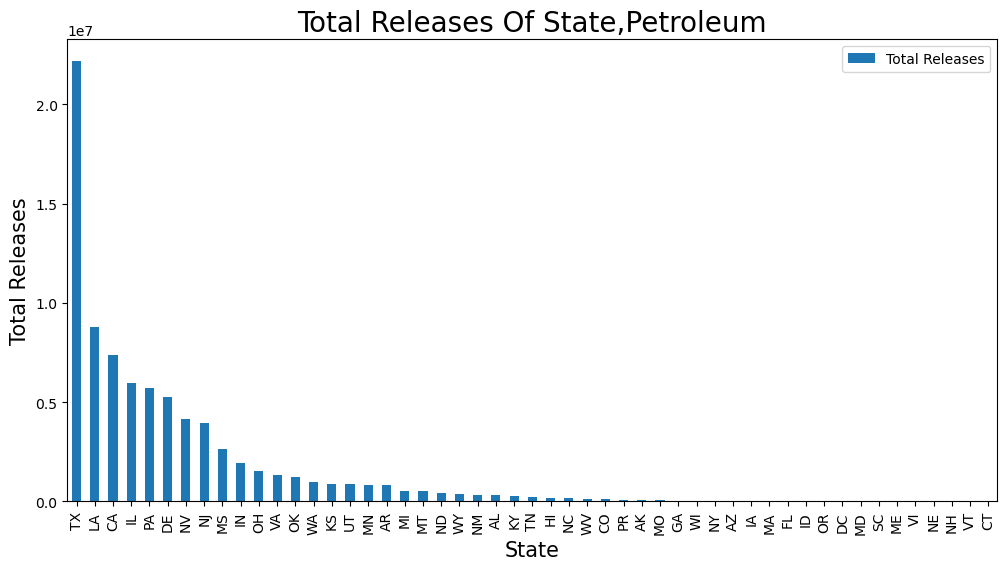

In [384]:
##Total releases of Petroleum by each state
State_group=petro_col.groupby(["State"])
sum1=State_group["Total Releases"].sum()
release_sum_df=sum1.to_frame()
release_sum_df=release_sum_df.sort_values("Total Releases",ascending=False)
release_sum_df=release_sum_df.astype({"Total Releases":"long"})
release_sum_df.head(10)
#other=release_sum_df["Total Releases"] < 5735986
#other_states=release_sum_df.loc[other]
#other_states_sum=other_states.sum()
## Bar chart for total releases of petroleum by State 
bar=release_sum_df.plot(kind="bar", figsize = (12,6))
bar.set_xlabel ("State", size = 15)
bar.set_ylabel ("Total Releases", size = 15)
bar.set_title("Total Releases Of State,Petroleum",size=20)



C:\Users\yixua\AppData\Local\Temp\ipykernel_35312\1530284011.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values=[22162810,8807921,7369010,5955656,5735986,other_states_sum[0]]


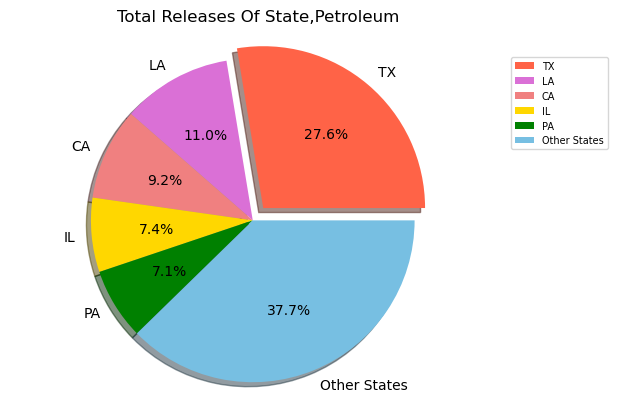

In [386]:
## Pie chart for top 5 total releases and other states of petroleum 
other=release_sum_df["Total Releases"] < 5735986
other_states=release_sum_df.loc[other]
other_states_sum=other_states.sum()
labels=["TX","LA","CA","IL","PA","Other States"]
values=[22162810,8807921,7369010,5955656,5735986,other_states_sum[0]]
colors = ["tomato", "orchid", "lightcoral", "gold","green","#77BFE2"]
explode = (0.1, 0, 0, 0, 0, 0)
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True,startangle=0)
plt.title("Total Releases Of State,Petroleum")
plt.axis("equal")
plt.legend(loc='center left',bbox_to_anchor=(1,0.3,0.3,1),prop={"size":7}) 
plt.savefig("png_output/Fig1.png")


In [369]:
##Specific Texas with all industries
new=new_col["State"]=="TX"
TX_df=new_col.loc[new]
TX_Industry=TX_df.groupby(["Industry Sector"])
TX_Industry_sum=TX_Industry["Total Releases"].sum()
TX_Industry_sum=TX_Industry_sum.sort_values(ascending=True)
TX_Industry_sum= TX_Industry_sum.round(2)



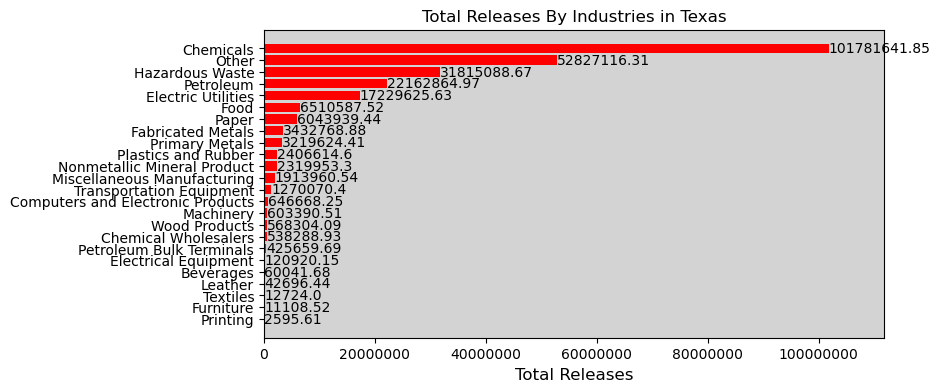

In [387]:
## Bar chart for Total releases by all industries in Texas
fig1,ax1=plt.subplots(figsize=(8,4),dpi=100)
barh2=plt.barh(y=TX_Industry_sum.index,width=TX_Industry_sum.values,height=0.8,color='red')
plt.yticks(rotation="horizontal", fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel("Total Releases",size=12)
plt.title("Total Releases By Industries in Texas")
plt.gca().set_facecolor("lightgray")
plt.xlim(0,max(TX_Industry_sum.values)+10000000)
ax1.get_xaxis().get_major_formatter().set_scientific(False)
plt.bar_label(barh2,fmt=(float))
plt.savefig("png_output/Fig2.png")

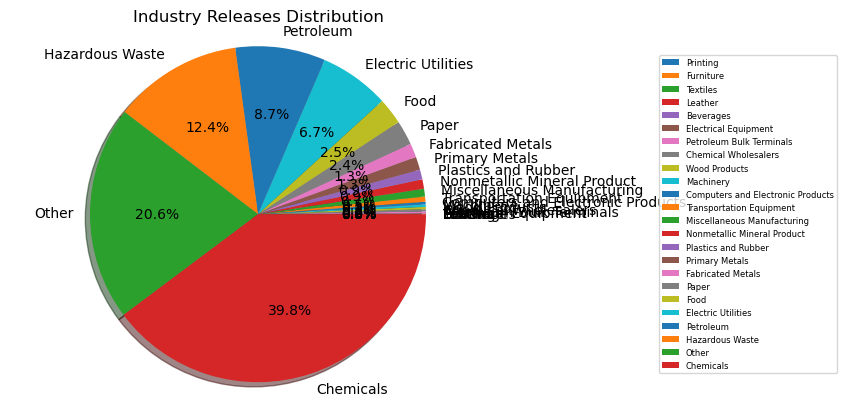

In [389]:
## Pie chart for Total releases by all industries in Texas
index=TX_Industry_sum.index
plt.pie(TX_Industry_sum,labels=index,autopct="%1.1f%%",shadow=True)
plt.title("Industry Releases Distribution")
plt.axis("equal")
plt.legend(loc='center left',bbox_to_anchor=(1.3,0,0.3,1),prop={"size":6}) 
plt.savefig("png_output/Fig3.png")

In [372]:
##Total releases in Petroleum 
petro_pounds=(new_col["Industry Sector"]=="Petroleum") & (new_col["Unit"]=="Pounds")
select_col=new_col.loc[petro_pounds]
select_col.head(3)

,Facility name,Street Address,City,State,Latitude,Longitude,Horizontal,Parent Co Name,Industry Sector,Chemical,Class,Metal Cata,Carcinogen,Unit,Fugitive Air,Stack Air,Water,Underground,Undergroud I,Underground II,Landfills,RCRA C Landfill,Other Landfills,Land Treatment,Surface IM,RCRA Surface IM,Other Surface,Other Disposal,Off_site Disposal,Total Releases,Production WSTE
0,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.63,-97.17,NAD83,CVR ENERGY INC,Petroleum,Certain glycol ethers,TRI,May contain metal,NO,Pounds,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.63,-97.17,NAD83,CVR ENERGY INC,Petroleum,Hydrogen cyanide,TRI,Non_Metal,NO,Pounds,0.00,32234.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,32234.00,32234.00
8,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.63,-97.17,NAD83,CVR ENERGY INC,Petroleum,Cyclohexane,TRI,Non_Metal,NO,Pounds,250.00,750.00,0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,1005.29,7758.29


In [373]:
##Create and calculate releases in Air ,land, Water
select_col["Air"]=select_col["Fugitive Air"]+select_col["Stack Air"]
select_col["Land"]=select_col["Underground"]+select_col["Undergroud I"]+select_col["Underground II"]+select_col["Landfills"]+select_col["RCRA C Landfill"]+select_col["Other Landfills"]+select_col["Land Treatment"]+select_col["Surface IM"]+select_col["RCRA Surface IM"]+select_col["Other Surface"]+select_col["Other Disposal"]
select_col.head(3)


C:\Users\yixua\AppData\Local\Temp\ipykernel_35312\3769493662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_col["Air"]=select_col["Fugitive Air"]+select_col["Stack Air"]
C:\Users\yixua\AppData\Local\Temp\ipykernel_35312\3769493662.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_col["Land"]=select_col["Underground"]+select_col["Undergroud I"]+select_col["Underground II"]+select_col["Landfills"]+select_col["RCRA C Landfill"]+select_col["Other Landfills"]+select_col["Land Treatment"]+sel

,Facility name,Street Address,City,State,Latitude,Longitude,Horizontal,Parent Co Name,Industry Sector,Chemical,Class,Metal Cata,Carcinogen,Unit,Fugitive Air,Stack Air,Water,Underground,Undergroud I,Underground II,Landfills,RCRA C Landfill,Other Landfills,Land Treatment,Surface IM,RCRA Surface IM,Other Surface,Other Disposal,Off_site Disposal,Total Releases,Production WSTE,Air,Land
0,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.63,-97.17,NAD83,CVR ENERGY INC,Petroleum,Certain glycol ethers,TRI,May contain metal,NO,Pounds,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.63,-97.17,NAD83,CVR ENERGY INC,Petroleum,Hydrogen cyanide,TRI,Non_Metal,NO,Pounds,0.00,32234.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,32234.00,32234.00,32234.00,0.00
8,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.63,-97.17,NAD83,CVR ENERGY INC,Petroleum,Cyclohexane,TRI,Non_Metal,NO,Pounds,250.00,750.00,0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,1005.29,7758.29,1000.00,0.00


In [374]:
##Create a dataframe for Water ,Air,Land ,Off-site
new_col=select_col[["Water","Air","Land","Off_site Disposal"]]
new_col

,Water,Air,Land,Off_site Disposal
0,0.00,0.00,0.00,0.00
5,0.00,32234.00,0.00,0.00
8,0.29,1000.00,0.00,5.00
9,0.00,1.20,0.00,0.00
16,64.00,376.00,0.00,0.00
...,...,...,...,...
78764,0.00,0.00,0.00,4.33
78768,0.00,639.50,0.00,0.00
78804,0.00,37.00,0.00,0.00
78805,1.00,29.00,0.00,5.00


In [375]:
##Calculate sum of releases in Air,Water,Land
new_sum=new_col.sum()
new_sum=new_sum.sort_values(ascending=True)
new_sum

Land                 4391351.12
Off_site Disposal    7789189.60
Water               33921468.87
Air                 34199159.60
dtype: float64

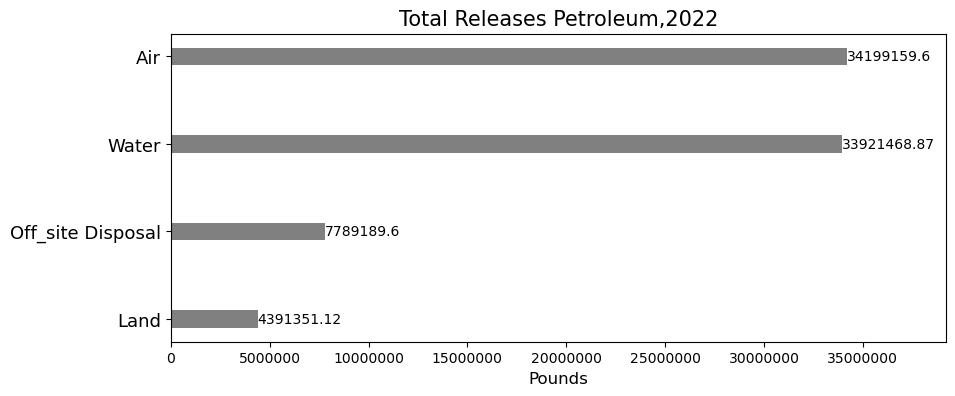

In [390]:
## Bar chart for total releases in air,water,land of petroleum
fig1, ax1 = plt.subplots(figsize=(10,4),dpi=100)
barh=plt.barh(y=new_sum.index,width=new_sum.values,height=0.2,color='gray')
#plt.Figure(figsize=(19,6))
#plt.xticks(rotation="horizontal", fontsize=8)
plt.yticks(fontsize=13)
plt.xlabel("Pounds",size=12)
plt.title("Total Releases Petroleum,2022",size=15)
plt.xlim(0, max(new_sum.values)+5000000)
ax1.get_xaxis().get_major_formatter().set_scientific(False)
plt.bar_label(barh,fmt=float)
plt.savefig("png_output/Fig4.png")



In [377]:
##New dataframe fot top 5 chemicals releases in Air
air_sum=select_col.groupby(["Chemical"])["Air"].sum()
sort_air=air_sum.sort_values(ascending=False)
sort_air=sort_air.to_frame()
other=sort_air["Air"] < 2451944.98
Other_Chemicals=sort_air.loc[other]
Other_sum=Other_Chemicals.sum()
Chemical_df=pd.DataFrame({"Ammonia":5842586.71,"Sulfuric acid":5079506.33,"Hydrogen cyanide":4847537.38,"n-Hexane":2880246.60,"Toluene":2451944.98,"Other Chemicals":Other_sum[0]},index=[1])
Chemical_df


C:\Users\yixua\AppData\Local\Temp\ipykernel_35312\2248527880.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Chemical_df=pd.DataFrame({"Ammonia":5842586.71,"Sulfuric acid":5079506.33,"Hydrogen cyanide":4847537.38,"n-Hexane":2880246.60,"Toluene":2451944.98,"Other Chemicals":Other_sum[0]},index=[1])


,Ammonia,Sulfuric acid,Hydrogen cyanide,n-Hexane,Toluene,Other Chemicals
1,5842586.71,5079506.33,4847537.38,2880246.60,2451944.98,13097337.60


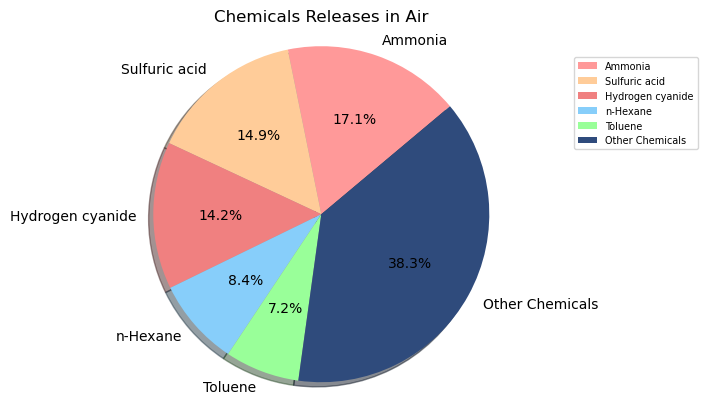

In [391]:
## Pie chart fot top 5 chemicals releases in Air
labels=["Ammonia","Sulfuric acid","Hydrogen cyanide","n-Hexane","Toluene","Other Chemicals"]
values=[5842586.71,5079506.33,4847537.38,2880246.6,2451944.98,13097337.6]
colors = ["#ff9999", "#ffcc99", "lightcoral", "lightskyblue","#99ff99","#2f4b7c"]
plt.pie(values,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True,startangle=40)
plt.title("Chemicals Releases in Air")
plt.axis("equal")
plt.legend(loc='center left',bbox_to_anchor=(1,0.3,0.3,1),prop={"size":7}) 
plt.savefig("png_output/Fig5.png")

In [379]:
###New dataframe fot top 5 chemicals releases in Water
water_sum=select_col.groupby(["Chemical"])["Water"].sum()
sort_water=water_sum.sort_values(ascending=False)
sort_water=sort_water.to_frame()
other=sort_water["Water"] < 26260.20
Other_Chemicals=sort_water.loc[other]
Other_sum=Other_Chemicals.sum()
Chemical_df=pd.DataFrame({"Nitrate compounds":33300832.82,"Ammonia":366618.55,"Ethylene glycol":56017.08,"Methanol":46429.81,"Zinc compounds":26260.20,"Other Chemicals":Other_sum[0]},index=[1])
Chemical_df

C:\Users\yixua\AppData\Local\Temp\ipykernel_35312\1889128139.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Chemical_df=pd.DataFrame({"Nitrate compounds":33300832.82,"Ammonia":366618.55,"Ethylene glycol":56017.08,"Methanol":46429.81,"Zinc compounds":26260.20,"Other Chemicals":Other_sum[0]},index=[1])


,Nitrate compounds,Ammonia,Ethylene glycol,Methanol,Zinc compounds,Other Chemicals
1,33300832.82,366618.55,56017.08,46429.81,26260.20,125310.41


C:\Users\yixua\AppData\Local\Temp\ipykernel_35312\3159963154.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Chemical_df=pd.DataFrame({"Nitrate compounds":33300832.82,"Other Chemicals":Other_sum[0]},index=[1])


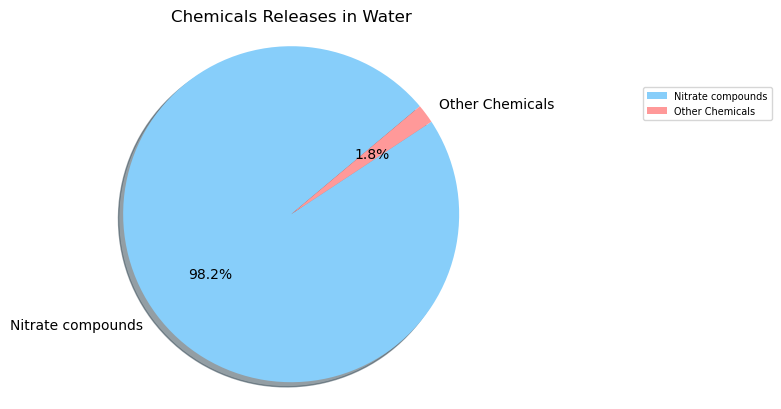

In [392]:
## Pie chart fot top 5 chemicals releases in Water
water_sum=select_col.groupby(["Chemical"])["Water"].sum()
sort_water=water_sum.sort_values(ascending=False)
sort_water=sort_water.to_frame()
other=sort_water["Water"] < 33300832.82
Other_Chemicals=sort_water.loc[other]
Other_sum=Other_Chemicals.sum()
Chemical_df=pd.DataFrame({"Nitrate compounds":33300832.82,"Other Chemicals":Other_sum[0]},index=[1])
labels=["Nitrate compounds","Other Chemicals"]
values=[33300832.82,620636.05]
color=["lightskyblue","#ff9999"]
plt.pie(values,labels=labels,autopct="%1.1f%%",colors=color,shadow=True,startangle=40)
plt.title("Chemicals Releases in Water")
plt.axis("equal")
plt.legend(loc='center left',bbox_to_anchor=(1.2,0.3,0.3,1),prop={"size":7}) 
plt.savefig("png_output/Fig6.png")

In [381]:
###New dataframe fot top 5 chemicals releases in Land
land_sum=select_col.groupby(["Chemical"])["Land"].sum()
sort_land=land_sum.sort_values(ascending=False)
sort_land=sort_land.to_frame()
other=sort_land["Land"] < 105370.44
Other_Chemicals=sort_land.loc[other]
Other_sum=Other_Chemicals.sum()
Chemical_df=pd.DataFrame({"Hydrogen sulfide":1775650.87,"Ammonia":1474424.71,"Nitrate compounds":273632.63,"tert-Butyl alcohol":260000.00,"Toluene":105370.44,"Other Chemicals":Other_sum[0]},index=[1])
Chemical_df

C:\Users\yixua\AppData\Local\Temp\ipykernel_35312\314715120.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Chemical_df=pd.DataFrame({"Hydrogen sulfide":1775650.87,"Ammonia":1474424.71,"Nitrate compounds":273632.63,"tert-Butyl alcohol":260000.00,"Toluene":105370.44,"Other Chemicals":Other_sum[0]},index=[1])


,Hydrogen sulfide,Ammonia,Nitrate compounds,tert-Butyl alcohol,Toluene,Other Chemicals
1,1775650.87,1474424.71,273632.63,260000.00,105370.44,502272.47


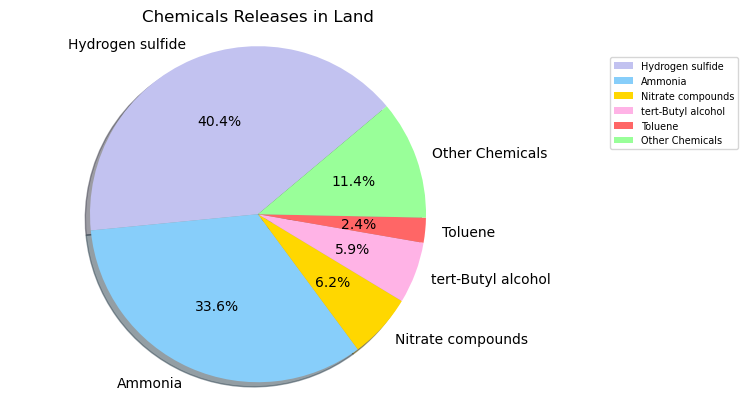

In [393]:
## Pie chart fot top 5 chemicals releases in Land
labels=["Hydrogen sulfide","Ammonia","Nitrate compounds","tert-Butyl alcohol","Toluene","Other Chemicals"]
values=[1775650.87,1474424.71,273632.63,260000.0,105370.44,502272.47]
color=["#c2c2f0","lightskyblue","gold","#ffb3e6","#ff6666","#99ff99"]
plt.pie(values,labels=labels,autopct="%1.1f%%",colors=color,shadow=True,startangle=40)
plt.title("Chemicals Releases in Land")
plt.axis("equal")
plt.legend(loc='center left',bbox_to_anchor=(1.2,0.3,0.3,1),prop={"size":7}) 
plt.savefig("png_output/Fig7.png")